In [1]:
%pip install kagglehub
%pip install pandas
%pip instamm numpy
%pip install matplotlib
%pip install seaborn
%pip install scipy
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: unknown command "instamm" - maybe you meant "install"
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv(f"./datasets.csv")
df.head()

,id,author_id,author_name,dataset_title,dataset_ref,dataset_size,file_count,file_types,usability,created_at,updated_at
0,1,atharvasoundankar,Atharva Soundankar,🌾 Smart Farming Sensor Data for Yield Prediction,atharvasoundankar/smart-farming-sensor-data-fo...,28 kB,1.0,CSV,10.0,2025-04-26 14:44:40.668338 +00:00,2025-04-26 14:44:40.668343 +00:00
1,2,ethancratchley,Ethan Cratchley,Email Phishing Dataset,ethancratchley/email-phishing-dataset,3 MB,1.0,CSV,10.0,2025-04-26 14:44:40.772041 +00:00,2025-04-26 14:44:40.772043 +00:00
2,3,dansbecker,DanB,Melbourne Housing Snapshot,dansbecker/melbourne-housing-snapshot,461 kB,1.0,CSV,7.1,2025-04-26 14:44:40.867835 +00:00,2025-04-26 14:44:40.867839 +00:00
3,4,sahideseker,Şahide ŞEKER,Tweet Sentiment Classification Dataset,sahideseker/tweet-sentiment-classification-dat...,2 kB,1.0,CSV,10.0,2025-04-26 14:44:40.965028 +00:00,2025-04-26 14:44:40.965033 +00:00
4,5,khushikyad001,Khushi Yadav,Air Quality Data,khushikyad001/air-quality-data,718 kB,1.0,CSV,10.0,2025-04-26 14:44:41.081329 +00:00,2025-04-26 14:44:41.081333 +00:00


# Post Processing Data

In [3]:
import re

def parse_size(size_str):
    size_str = size_str.strip().upper()
    match = re.match(r"([\d\.]+)\s*(B|KB|MB|GB)", size_str)
    if not match:
        return None

    size, unit = match.groups()
    size = float(size)

    multiplier = {
        "B": 1,
        "KB": 1000,
        "MB": 1000 ** 2,
        "GB": 1000 ** 3
    }

    return size * multiplier[unit]


df["size_bytes"] = df["dataset_size"].apply(parse_size)
df["size_mib"] = df["size_bytes"] / 1024 / 1024
df.head()

,id,author_id,author_name,dataset_title,dataset_ref,dataset_size,file_count,file_types,usability,created_at,updated_at,size_bytes,size_mib
0,1,atharvasoundankar,Atharva Soundankar,🌾 Smart Farming Sensor Data for Yield Prediction,atharvasoundankar/smart-farming-sensor-data-fo...,28 kB,1.0,CSV,10.0,2025-04-26 14:44:40.668338 +00:00,2025-04-26 14:44:40.668343 +00:00,28000.0,0.026703
1,2,ethancratchley,Ethan Cratchley,Email Phishing Dataset,ethancratchley/email-phishing-dataset,3 MB,1.0,CSV,10.0,2025-04-26 14:44:40.772041 +00:00,2025-04-26 14:44:40.772043 +00:00,3000000.0,2.861023
2,3,dansbecker,DanB,Melbourne Housing Snapshot,dansbecker/melbourne-housing-snapshot,461 kB,1.0,CSV,7.1,2025-04-26 14:44:40.867835 +00:00,2025-04-26 14:44:40.867839 +00:00,461000.0,0.439644
3,4,sahideseker,Şahide ŞEKER,Tweet Sentiment Classification Dataset,sahideseker/tweet-sentiment-classification-dat...,2 kB,1.0,CSV,10.0,2025-04-26 14:44:40.965028 +00:00,2025-04-26 14:44:40.965033 +00:00,2000.0,0.001907
4,5,khushikyad001,Khushi Yadav,Air Quality Data,khushikyad001/air-quality-data,718 kB,1.0,CSV,10.0,2025-04-26 14:44:41.081329 +00:00,2025-04-26 14:44:41.081333 +00:00,718000.0,0.684738


In [4]:
print(f"Total rows {len(df)}")
print(f"Total file size with NaN {df["size_bytes"].isna().sum()}")
df = df.dropna(subset=["size_mib"])
print(f"Remained after polishing NaN file sizes {len(df)}")

Total rows 9956
Total file size with NaN 34
Remained after polishing NaN file sizes 9922


In [5]:
print(f"Total rows {len(df)}")
print(f"Total file count with NaN {df["file_count"].isna().sum()}")
df = df.dropna(subset=["file_count"])
print(f"Remained after polishing NaN file count {len(df)}")

Total rows 9922
Total file count with NaN 394
Remained after polishing NaN file count 9528


# Dataset Size Distribution

In [6]:
df["size_bytes"].head()

0      28000.0
1    3000000.0
2     461000.0
3       2000.0
4     718000.0
Name: size_bytes, dtype: float64

In [7]:
min_row = df.loc[df["size_mib"].idxmin()]
min_row

id                                                 6113
author_id                                nancyalaswad90
author_name                          Ms. Nancy Al Aswad
dataset_title                   Chinook sample database
dataset_ref      nancyalaswad90/chinook-sample-database
dataset_size                                      160 B
file_count                                          1.0
file_types                                        other
usability                                          10.0
created_at            2025-04-26 15:02:38.544608 +00:00
updated_at            2025-04-26 15:02:38.544611 +00:00
size_bytes                                        160.0
size_mib                                       0.000153
Name: 6115, dtype: object

In [8]:
max_row = df.loc[df["size_mib"].idxmax()]
max_row

id                                            9426
author_id                                thbdh5765
author_name                   Hoang Phuc (K18 HCM)
dataset_title                           ILSVRC2012
dataset_ref                   thbdh5765/ilsvrc2012
dataset_size                                146 GB
file_count                               1281167.0
file_types                                   other
usability                                      6.9
created_at       2025-04-26 15:12:37.199055 +00:00
updated_at       2025-04-26 15:12:37.199060 +00:00
size_bytes                          146000000000.0
size_mib                             139236.450195
Name: 9425, dtype: object

In [9]:
range_values = df["size_mib"].max() - df["size_mib"].min()
range_values

np.float64(139236.4500427246)

In [10]:
import numpy as np
import pandas as pd

percentiles = [25, 50, 75, 90, 95, 99]
percentile_values = np.percentile(df["size_bytes"].dropna(), percentiles)
size_mb_df = pd.DataFrame({
    "Percentile": percentiles,
    "Dataset Size (MiB)": np.round(percentile_values / 1024**2, 2)
})

size_mb_df

,Percentile,Dataset Size (MiB)
0,25,0.07
1,50,1.91
2,75,140.19
3,90,1907.35
4,95,5722.05
5,99,27656.56


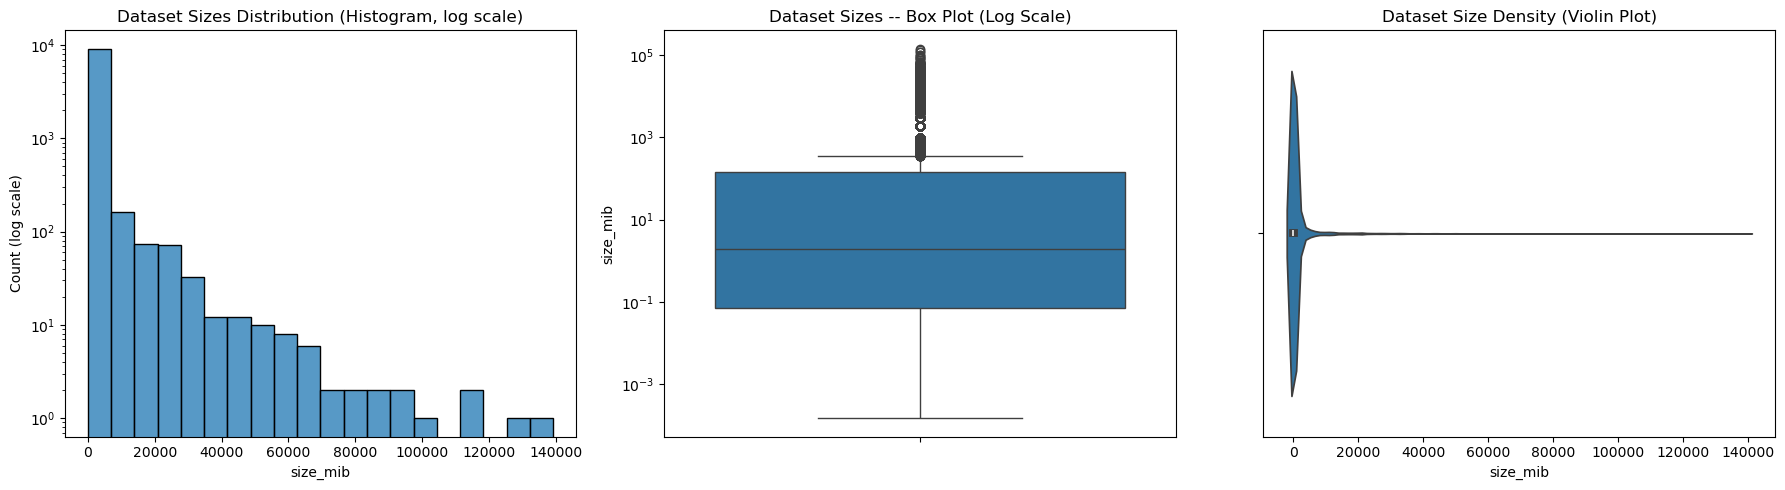

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["size_mib"], bins=20, ax=axs[0])
axs[0].set_yscale("log")
axs[0].set_title("Dataset Sizes Distribution (Histogram, log scale)")
axs[0].set_ylabel("Count (log scale)")

sns.boxplot(y=df["size_mib"], ax=axs[1])
axs[1].set_yscale("log")
axs[1].set_title("Dataset Sizes -- Box Plot (Log Scale)")

sns.violinplot(x=df["size_mib"], ax=axs[2])
axs[2].set_title("Dataset Size Density (Violin Plot)")

plt.tight_layout()
plt.show()

The data shows a pronounced asymmetry. The tail on the right side is much longer than on the left, and therefore we say that the asymmetry is positive. Let's check it quantitatively

In [12]:
df["size_bytes"].skew()

np.float64(9.85202258686114)

In [13]:
threshold = 0.2 * df['size_bytes'].max()
count_under_threshold = df[df['size_bytes'] <= threshold].shape[0]
share = count_under_threshold / df.shape[0]
print(f"{share:.2%} of datasets have a size <= 20% from maximum size")

99.01% of datasets have a size <= 20% from maximum size


$\Rightarrow$ The Pareto rule is not just fulfilled — it is exceeded by a huge margin

# File Count Distribution

In [14]:
df["file_count"].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: file_count, dtype: float64

In [15]:
min_row = df.loc[df["file_count"].idxmin()]
min_row

id                                                               1
author_id                                        atharvasoundankar
author_name                                     Atharva Soundankar
dataset_title     🌾 Smart Farming Sensor Data for Yield Prediction
dataset_ref      atharvasoundankar/smart-farming-sensor-data-fo...
dataset_size                                                 28 kB
file_count                                                     1.0
file_types                                                     CSV
usability                                                     10.0
created_at                       2025-04-26 14:44:40.668338 +00:00
updated_at                       2025-04-26 14:44:40.668343 +00:00
size_bytes                                                 28000.0
size_mib                                                  0.026703
Name: 0, dtype: object

In [16]:
max_row = df.loc[df["file_count"].idxmax()]
max_row

id                                                            7752
author_id                                              pascalbliem
author_name                                           Pascal Bliem
dataset_title       Handwritten Chinese Character (Hanzi) Datasets
dataset_ref      pascalbliem/handwritten-chinese-character-hanz...
dataset_size                                                 14 GB
file_count                                               3999566.0
file_types                                                   other
usability                                                      7.5
created_at                       2025-04-26 15:07:37.955480 +00:00
updated_at                       2025-04-26 15:07:37.955485 +00:00
size_bytes                                           14000000000.0
size_mib                                               13351.44043
Name: 7753, dtype: object

In [17]:
range_values = df["file_count"].max() - df["file_count"].min()
range_values

np.float64(3999565.0)

In [18]:
import numpy as np
import pandas as pd

percentiles = [25, 50, 75, 90, 95, 99]
percentile_values = np.percentile(df["file_count"].dropna(), percentiles)

percentile_df = pd.DataFrame({
    "Percentile": percentiles,
    "Dataset File Count": percentile_values.astype(int)
})

percentile_df

,Percentile,Dataset File Count
0,25,1
1,50,2
2,75,80
3,90,10023
4,95,33811
5,99,212101


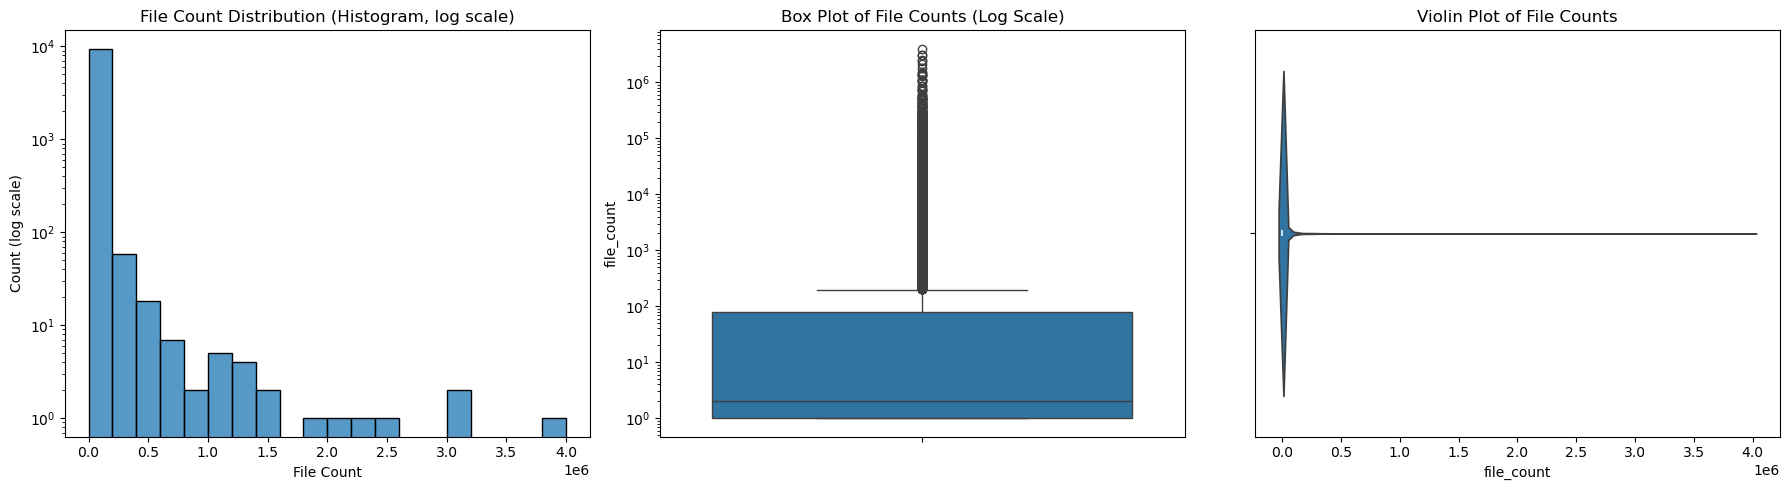

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["file_count"], bins=20, ax=axs[0])
axs[0].set_yscale("log")
axs[0].set_title("File Count Distribution (Histogram, log scale)")
axs[0].set_xlabel("File Count")
axs[0].set_ylabel("Count (log scale)")

sns.boxplot(y=df["file_count"], ax=axs[1])
axs[1].set_yscale("log")
axs[1].set_title("Box Plot of File Counts (Log Scale)")

sns.violinplot(x=df["file_count"], ax=axs[2])
axs[2].set_title("Violin Plot of File Counts")

plt.tight_layout()
plt.show()

# Distribution Summary

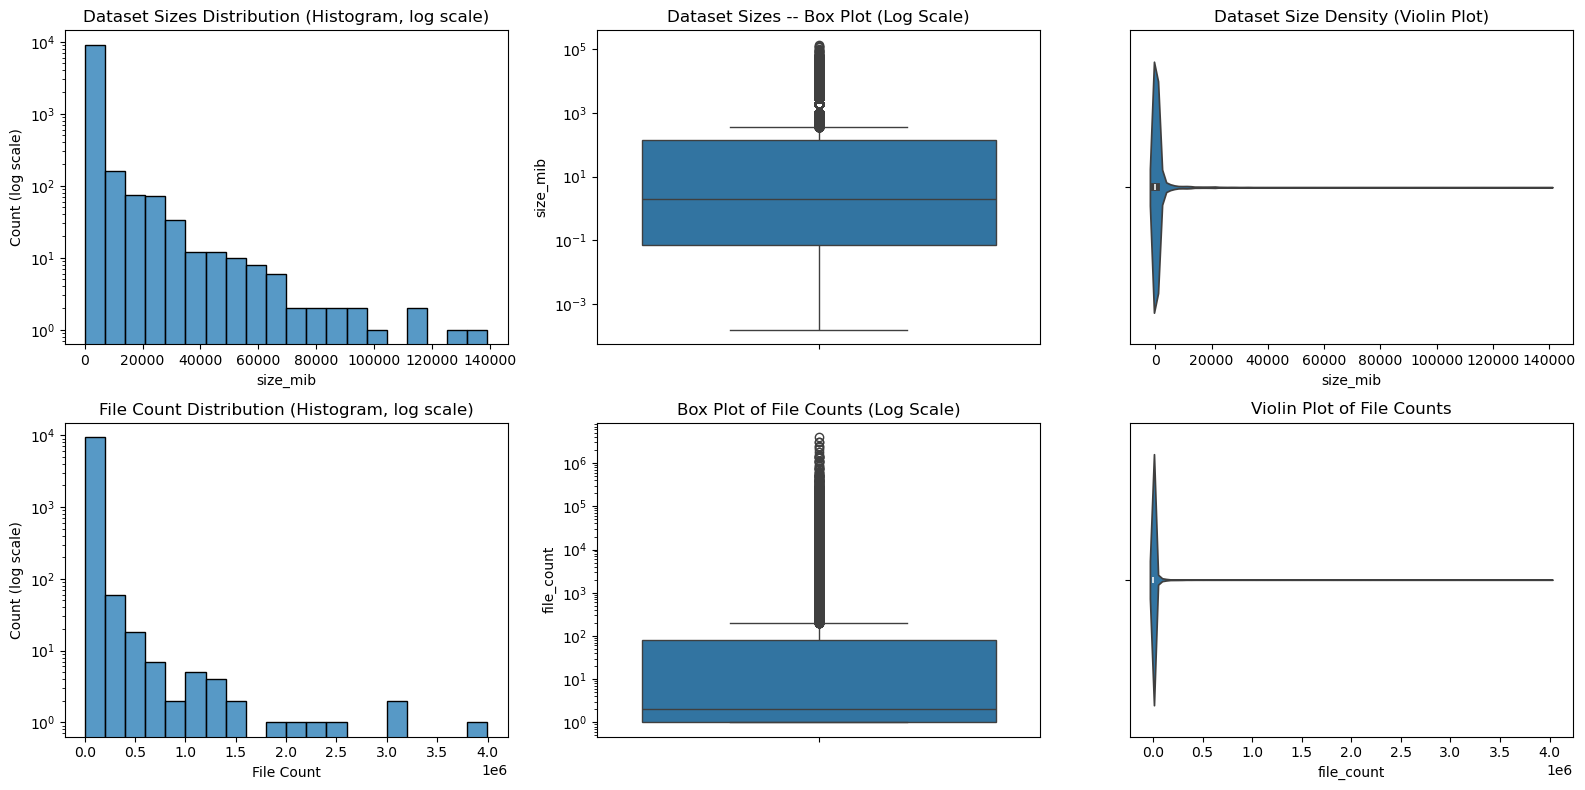

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(16, 8))

# Первый ряд: size_mib
sns.histplot(df["size_mib"], bins=20, ax=axs[0, 0])
axs[0, 0].set_yscale("log")
axs[0, 0].set_title("Dataset Sizes Distribution (Histogram, log scale)")
axs[0, 0].set_ylabel("Count (log scale)")

sns.boxplot(y=df["size_mib"], ax=axs[0, 1])
axs[0, 1].set_yscale("log")
axs[0, 1].set_title("Dataset Sizes -- Box Plot (Log Scale)")

sns.violinplot(x=df["size_mib"], ax=axs[0, 2])
axs[0, 2].set_title("Dataset Size Density (Violin Plot)")

# Второй ряд: file_count
sns.histplot(df["file_count"], bins=20, ax=axs[1, 0])
axs[1, 0].set_yscale("log")
axs[1, 0].set_title("File Count Distribution (Histogram, log scale)")
axs[1, 0].set_xlabel("File Count")
axs[1, 0].set_ylabel("Count (log scale)")

sns.boxplot(y=df["file_count"], ax=axs[1, 1])
axs[1, 1].set_yscale("log")
axs[1, 1].set_title("Box Plot of File Counts (Log Scale)")

sns.violinplot(x=df["file_count"], ax=axs[1, 2])
axs[1, 2].set_title("Violin Plot of File Counts")

plt.tight_layout()
plt.show()


In [21]:
import pandas as pd
import numpy as np

percentiles = [25, 50, 75, 90, 95, 99]

percentile_data = {
    "percentile": percentiles,
    "size_mib": np.percentile(df["size_mib"], percentiles),
    "file_count": np.percentile(df["file_count"], percentiles)
}

percentile_df = pd.DataFrame(percentile_data)

print(percentile_df)

import pandas as pd
import numpy as np

percentiles = [25, 50, 75, 90, 95, 99]

scenarios = [(25, 25), (50, 50), (75, 75), (90, 90), (99, 99), (99, 25), (25, 99)]
scenarios_size_mib = [x[0] for x in scenarios]
scenarios_file_count = [x[1] for x in scenarios]

percentile_data = {
    "scenario": scenarios,
    "size_mib": np.percentile(df["size_mib"], scenarios_size_mib),
    "file_count": np.percentile(df["file_count"], scenarios_file_count)
}

percentile_df = pd.DataFrame(percentile_data)

print(percentile_df)

   percentile      size_mib  file_count
0          25      0.072479        1.00
1          50      1.907349        2.00
2          75    140.190125       80.00
3          90   1907.348633    10023.00
4          95   5722.045898    33811.05
5          99  27656.555176   212101.37
   scenario      size_mib  file_count
0  (25, 25)      0.072479        1.00
1  (50, 50)      1.907349        2.00
2  (75, 75)    140.190125       80.00
3  (90, 90)   1907.348633    10023.00
4  (99, 99)  27656.555176   212101.37
5  (99, 25)  27656.555176        1.00
6  (25, 99)      0.072479   212101.37


# Correlation Analysis

<Axes: xlabel='size_bytes', ylabel='file_count'>

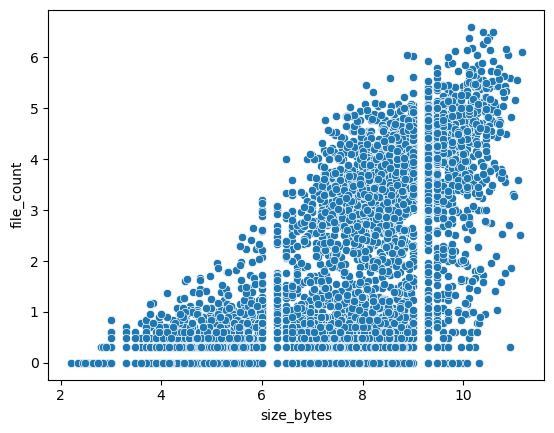

In [22]:
sns.scatterplot(x=np.log10(df["size_bytes"]), y=np.log10(df["file_count"]))

In [23]:
from scipy.stats import spearmanr

rho, p_value = spearmanr(df["size_mib"], df["file_count"])
print(f"Spearman correlation: {rho:.3f}, p-value: {p_value:.3e}")

Spearman correlation: 0.718, p-value: 0.000e+00


We see strong, direct, non random correlation

# Clasterization

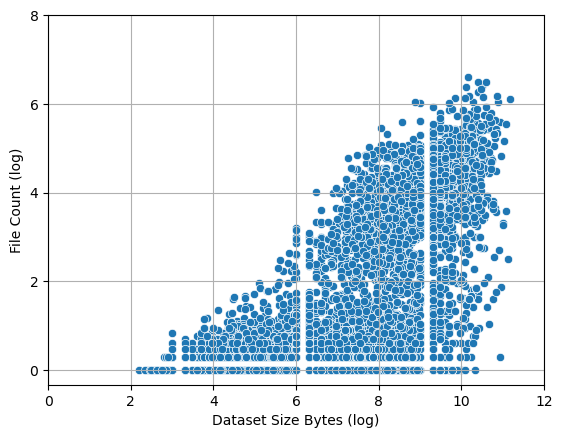

In [98]:
x_edges = np.arange(0, 14, 2)
y_edges = np.arange(0, 10, 2)

sns.scatterplot(x=df["log_size"], y=df["log_count"])
plt.grid(True)
plt.xticks(ticks=x_edges)
plt.yticks(ticks=y_edges)
plt.xlabel("Dataset Size Bytes (log)")
plt.ylabel("File Count (log)")
plt.show()

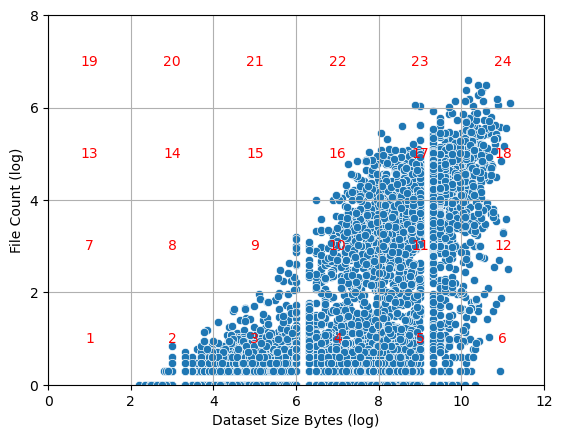

In [99]:
df["log_size_bytes"] = np.log10(df["size_bytes"])
df["log_count"] = np.log10(df["file_count"])

x_edges = np.arange(0, 14, 2)
y_edges = np.arange(0, 10, 2)

# Визуализация точек
# plt.figure(figsize=(, 6))
sns.scatterplot(x=df["log_size_bytes"], y=df["log_count"])
plt.grid(True)
plt.xticks(ticks=x_edges)
plt.yticks(ticks=y_edges)
plt.xlabel("log_size_bytes")
plt.ylabel("log_count")

# Нумерация квадратов: слева направо, снизу вверх
square_number = 1
for y0, y1 in zip(y_edges[:-1], y_edges[1:]):
    for x0, x1 in zip(x_edges[:-1], x_edges[1:]):
        x_center = (x0 + x1) / 2
        y_center = (y0 + y1) / 2
        plt.text(x_center, y_center, str(square_number),
                 color='red', ha='center', va='center', fontsize=10)
        square_number += 1

plt.xlim([x_edges[0], x_edges[-1]])
plt.ylim([y_edges[0], y_edges[-1]])
plt.xlabel("Dataset Size Bytes (log)")
plt.ylabel("File Count (log)")
plt.show()

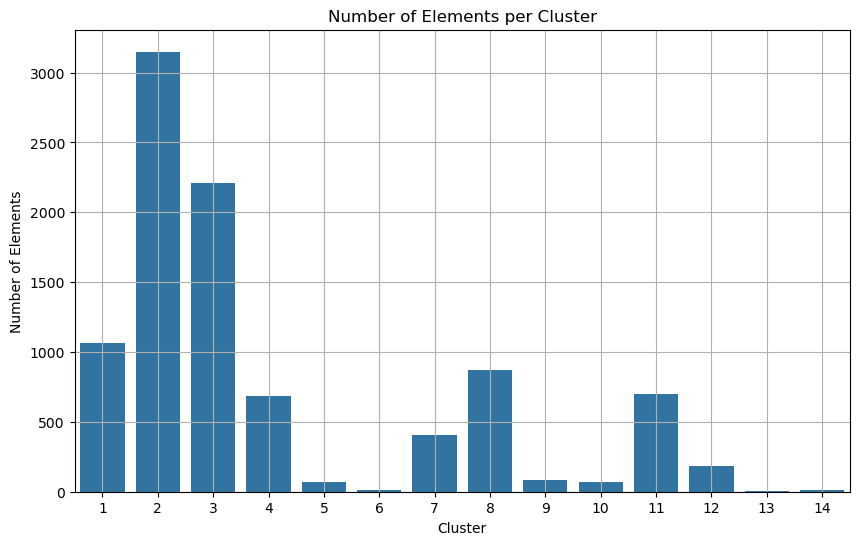

,id,author_id,author_name,dataset_title,dataset_ref,dataset_size,file_count,file_types,usability,created_at,updated_at,size_bytes,size_mib,log_size,log_count,log_size_bytes,cluster
0,4,sahideseker,Şahide ŞEKER,Tweet Sentiment Classification Dataset,sahideseker/tweet-sentiment-classification-dat...,2 kB,1.0,CSV,10.0,2025-04-26 14:44:40.965028 +00:00,2025-04-26 14:44:40.965033 +00:00,2000.0,0.001907,3.301030,0.0,3.301030,1
1,9,adilshamim8,Adil Shamim,Math-Students Performance Data,adilshamim8/math-students,7 kB,1.0,CSV,10.0,2025-04-26 14:44:41.481848 +00:00,2025-04-26 14:44:41.481851 +00:00,7000.0,0.006676,3.845098,0.0,3.845098,1
2,11,arshadrahmanziban,Arshad Rahman Ziban,Social Media Aspects,arshadrahmanziban/social-media-aspects,974 B,1.0,CSV,10.0,2025-04-26 14:44:41.685516 +00:00,2025-04-26 14:44:41.685522 +00:00,974.0,0.000929,2.988559,0.0,2.988559,1
3,29,ak0212,Akshay Kumar,Average Daily Screen Time for Children,ak0212/average-daily-screen-time-for-children,1 kB,1.0,CSV,10.0,2025-04-26 14:44:45.772317 +00:00,2025-04-26 14:44:45.772321 +00:00,1000.0,0.000954,3.000000,0.0,3.000000,1
4,31,allubie,Ishtiaque Ahmed,IMDb Top 250 Movies,allubie/imdb-top-250-movies,4 kB,1.0,CSV,10.0,2025-04-26 14:44:45.938651 +00:00,2025-04-26 14:44:45.938656 +00:00,4000.0,0.003815,3.602060,0.0,3.602060,1


In [100]:
import numpy as np
import pandas as pd

cluster_2 = df[ (df["log_size_bytes"] >= 2) & (df["log_size_bytes"] < 4) & (df["log_count"] < 2) ].copy()
cluster_3 = df[ (df["log_size_bytes"] >= 4) & (df["log_size_bytes"] < 6) & (df["log_count"] < 2) ].copy()
cluster_4 = df[ (df["log_size_bytes"] >= 6) & (df["log_size_bytes"] < 8) & (df["log_count"] < 2) ].copy()
cluster_5 = df[ (df["log_size_bytes"] >= 8) & (df["log_size_bytes"] < 10) & (df["log_count"] < 2) ].copy()
cluster_6 = df[ (df["log_size_bytes"] >= 10) & (df["log_size_bytes"] < 12) & (df["log_count"] < 2) ].copy()
cluster_9 = df[ (df["log_size_bytes"] >= 4) & (df["log_size_bytes"] < 6) & (df["log_count"] >= 2) & (df["log_count"] < 4) ].copy()
cluster_10 = df[ (df["log_size_bytes"] >= 6) & (df["log_size_bytes"] < 8) & (df["log_count"] >= 2) & (df["log_count"] < 4) ].copy()
cluster_11 = df[ (df["log_size_bytes"] >= 8) & (df["log_size_bytes"] < 10) & (df["log_count"] >= 2) & (df["log_count"] < 4) ].copy()
cluster_12 = df[ (df["log_size_bytes"] >= 10) & (df["log_size_bytes"] < 12) & (df["log_count"] >= 2) & (df["log_count"] < 4) ].copy()
cluster_16 = df[ (df["log_size_bytes"] >= 6) & (df["log_size_bytes"] < 8) & (df["log_count"] >= 4) & (df["log_count"] < 6) ].copy()
cluster_17 = df[ (df["log_size_bytes"] >= 8) & (df["log_size_bytes"] < 10) & (df["log_count"] >= 4) & (df["log_count"] < 6) ].copy()
cluster_18 = df[ (df["log_size_bytes"] >= 10) & (df["log_size_bytes"] < 12) & (df["log_count"] >= 4) & (df["log_count"] < 6) ].copy()
cluster_23 = df[ (df["log_size_bytes"] >= 8) & (df["log_size_bytes"] < 10) & (df["log_count"] >= 6) & (df["log_count"] < 8) ].copy()
cluster_24 = df[ (df["log_size_bytes"] >= 10) & (df["log_size_bytes"] < 12) & (df["log_count"] >= 6) & (df["log_count"] < 8) ].copy()

cluster_2["cluster"] = 1
cluster_3["cluster"] = 2
cluster_4["cluster"] = 3
cluster_5["cluster"] = 4
cluster_6["cluster"] = 5
cluster_9["cluster"] = 6
cluster_10["cluster"] = 7
cluster_11["cluster"] = 8
cluster_12["cluster"] = 9
cluster_16["cluster"] = 10
cluster_17["cluster"] = 11
cluster_18["cluster"] = 12
cluster_23["cluster"] = 13
cluster_24["cluster"] = 14


all_clusters = pd.concat([
    cluster_2, cluster_3, cluster_4, cluster_5, cluster_6, cluster_9, cluster_10, 
    cluster_11, cluster_12, cluster_16, cluster_17, cluster_18, cluster_23, cluster_24,
], ignore_index=True)

# Построение bar chart по количеству элементов в каждом кластере
cluster_counts = all_clusters['cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index.astype(str), y=cluster_counts.values)
plt.xlabel("Cluster")
plt.ylabel("Number of Elements")
plt.title("Number of Elements per Cluster")
plt.grid(True)
plt.show()

all_clusters.head()

In [97]:
representative_rows = []

for cluster_id in sorted(all_clusters['cluster'].unique()):
    cluster_data = all_clusters[all_clusters['cluster'] == cluster_id]
    median_value = cluster_data['log_size_bytes'].median()
    idx = (cluster_data['log_size_bytes'] - median_value).abs().idxmin()
    representative_row = cluster_data.loc[idx]
    representative_rows.append(representative_row)

representatives = pd.DataFrame(representative_rows)
representatives

,id,author_id,author_name,dataset_title,dataset_ref,dataset_size,file_count,file_types,usability,created_at,updated_at,size_bytes,size_mib,log_size,log_count,log_size_bytes,cluster
5,39,shuvokumarbasak2030,Shuvo Kumar Basak-4004.o,HIV Adult Prevalence Rate 🌍🧬,shuvokumarbasak2030/hiv-adult-prevalence-rate,3 kB,1.0,CSV,8.2,2025-04-26 14:44:46.770784 +00:00,2025-04-26 14:44:46.770786 +00:00,3.000000e+03,0.002861,3.477121,0.000000,3.477121,1
1092,62,tharunmss,Tharun M S S,Nutritional Breakdown of Foods,tharunmss/nutritional-breakdown-of-foods,109 kB,1.0,CSV,10.0,2025-04-26 14:44:52.991211 +00:00,2025-04-26 14:44:52.991214 +00:00,1.090000e+05,0.103951,5.037426,0.000000,5.037426,2
4246,145,agrafintech,Agra Fintech,Audit opinions of Turkish Public Companies,agrafintech/financial-data-of-turkish-public-c...,6 MB,1.0,CSV,10.0,2025-04-26 14:45:07.172876 +00:00,2025-04-26 14:45:07.172879 +00:00,6.000000e+06,5.722046,6.778151,0.000000,6.778151,3
6910,6932,jsrojas,Juan Sebastián Rojas,Labeled Network Traffic flows - 141 Applications,jsrojas/labeled-network-traffic-flows-114-appl...,380 MB,1.0,CSV,8.8,2025-04-26 15:05:07.879557 +00:00,2025-04-26 15:05:07.879560 +00:00,3.800000e+08,362.396240,8.579784,0.000000,8.579784,4
7114,670,seshurajup,SeshuRaju 🧘‍♂️,waveform inversion 11,seshurajup/waveform-inversion-11,22 GB,69.0,"other, CSV",4.7,2025-04-26 14:46:37.995529 +00:00,2025-04-26 14:46:37.995532 +00:00,2.200000e+10,20980.834961,10.342423,1.838849,10.342423,5
7192,8788,mmd1426,Mohammad Mahdi Dehghani,ILPD (Iranian License Plate Dataset),mmd1426/ilpd-iranian-license-plate-dataset,679 kB,441.0,other,6.9,2025-04-26 15:10:43.673152 +00:00,2025-04-26 15:10:43.673156 +00:00,6.790000e+05,0.647545,5.831870,2.644439,5.831870,6
7281,2677,pkdarabi,Parisa Karimi Darabi,Diagnosis of Diabetic Retinopathy,pkdarabi/diagnosis-of-diabetic-retinopathy,32 MB,5676.0,other,7.5,2025-04-26 14:52:27.927948 +00:00,2025-04-26 14:52:27.927951 +00:00,3.200000e+07,30.517578,7.505150,3.754042,7.505150,7
7770,2051,abhisheksjha,Abhishek-S-Jha,Time Series Air Quality Data of India (2010-2023),abhisheksjha/time-series-air-quality-data-of-i...,487 MB,454.0,CSV,10.0,2025-04-26 14:50:40.544160 +00:00,2025-04-26 14:50:40.544164 +00:00,4.870000e+08,464.439392,8.687529,2.657056,8.687529,8
8487,3227,robikscube,Rob Mulla,Driving Video with Object Tracking,robikscube/driving-video-with-object-tracking,20 GB,1002.0,"other, CSV",10.0,2025-04-26 14:54:06.531196 +00:00,2025-04-26 14:54:06.531198 +00:00,2.000000e+10,19073.486328,10.301030,3.000868,10.301030,9
8582,4220,subinium,Subin An,Full Emoji Image Dataset,subinium/emojiimage-dataset,50 MB,14253.0,"CSV, other",9.4,2025-04-26 14:57:00.768086 +00:00,2025-04-26 14:57:00.768089 +00:00,5.000000e+07,47.683716,7.698970,4.153906,7.698970,10
